### Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    format="tf",
    verbose=True,
)
class_name = validation_set.class_names
print(class_name)

Found 17573 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

### Loading Model

In [3]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

### Visualizing and Predicting 

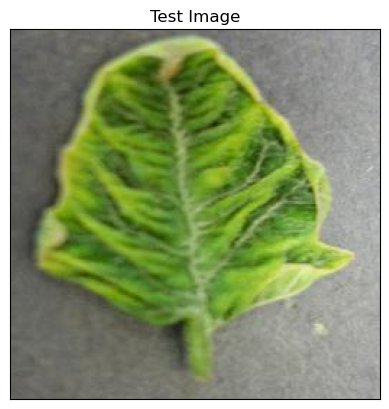

In [4]:
import cv2
image_path = 'test/TomatoYellowCurlVirus6.JPG'
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
#Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Image 

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting image to batch
predictions = model.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [6]:
print(predictions)

[[3.4464696e-23 7.1648560e-24 8.8458240e-18 9.1194414e-20 1.6317245e-19
  2.8828508e-17 6.9719759e-22 9.0634179e-23 1.3690555e-23 5.2263153e-21
  7.7209580e-21 2.1919340e-19 4.3094824e-18 1.4545849e-17 2.2312781e-22
  3.7898012e-15 1.8194377e-20 1.2269947e-21 3.6458797e-16 8.6324310e-21
  1.3620120e-24 1.8599065e-21 3.8397377e-18 2.1438184e-15 2.0491634e-20
  1.0459417e-16 1.4313589e-21 5.1957028e-21 3.2642633e-13 5.4891331e-15
  2.6288027e-18 7.4062138e-15 2.8663669e-19 3.9045873e-15 4.9175906e-16
  1.0000000e+00 1.5914377e-15 5.1345641e-21]]


In [7]:
result_index = np.argmax(predictions) #return max element index

np.int64(35)

### Displaying Predictions

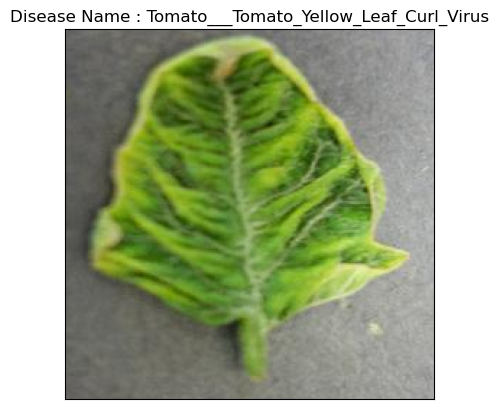

In [8]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Disease Name : {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()